GENERATING AND EXPORTING DATA

In [2]:
# Generating data for schaffer function N. 4 with range -100 to 100 (for both variable) and step size 0.5
import numpy as np
#making empty arrays 
X=[]
Y=[]
Z=[]
for x in np.arange (-100,100,5):
    for y in np.arange (-100,100,5):
#framing equation and making dataset
        f= 0.5 + (np.cos(np.sin(np.abs(x**2 - y**2))) - 0.5) / (1 + 0.001*(x**2 + y**2))**2
        X.append(x)
        Y.append(y)
        Z.append(f)

In [3]:
# Creating a dataframe for the data generated above
import pandas as pd
data=zip(X,Y,Z)
data_to_excel=pd.DataFrame(data)
data_to_excel.columns=['input_x', 'input_y', 'output_z']
print(data_to_excel)
#saveing this dataframe to an excel
data_to_excel.to_csv(r'C:\Users\imadu\OneDrive\Desktop\CODING\ML assignment IITHYD\excel_assg2.csv')
data_to_excel.to_csv('excel_assg2.csv')

      input_x  input_y  output_z
0        -100     -100  0.501134
1        -100      -95  0.500315
2        -100      -90  0.500867
3        -100      -85  0.500533
4        -100      -80  0.501539
...       ...      ...       ...
1595       95       75  0.501041
1596       95       80  0.500211
1597       95       85  0.501651
1598       95       90  0.500173
1599       95       95  0.501378

[1600 rows x 3 columns]


In [4]:
det=pd.read_csv('excel_assg2.csv')
det.drop("Unnamed: 0",axis = 1,inplace = True)
print(det)

      input_x  input_y  output_z
0        -100     -100  0.501134
1        -100      -95  0.500315
2        -100      -90  0.500867
3        -100      -85  0.500533
4        -100      -80  0.501539
...       ...      ...       ...
1595       95       75  0.501041
1596       95       80  0.500211
1597       95       85  0.501651
1598       95       90  0.500173
1599       95       95  0.501378

[1600 rows x 3 columns]


NORMALIZING DATA

In [5]:
# Normalize the dataframe
df_normalized = (data_to_excel - data_to_excel.min()) / (data_to_excel.max() - data_to_excel.min())
print(df_normalized)


      input_x   input_y  output_z
0         0.0  0.000000  0.001952
1         0.0  0.025641  0.000313
2         0.0  0.051282  0.001418
3         0.0  0.076923  0.000750
4         0.0  0.102564  0.002762
...       ...       ...       ...
1595      1.0  0.897436  0.001767
1596      1.0  0.923077  0.000105
1597      1.0  0.948718  0.002987
1598      1.0  0.974359  0.000029
1599      1.0  1.000000  0.002440

[1600 rows x 3 columns]


In [6]:
#clubbing 2 inputs as one
IN=df_normalized.iloc[:,0:2]
OUT=df_normalized.iloc[:,2]

print(IN.shape, OUT.shape)

(1600, 2) (1600,)


MAKING ANN 

In [7]:
#Splitting the data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(IN,OUT,test_size=0.15,random_state=0)
print(train_x.shape, train_y.shape)

#Creating sequential ANN Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#Creating ANN with mentioned nodes,hidden layers,inputs,outputs and activation function. 
model=Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))
#adding compiler and loss function
model.compile(optimizer='adam',loss='MSE')


(1360, 2) (1360,)


In [8]:
#Training data
train_data=model.fit(train_x,train_y,epochs=500,validation_split=0.15)
print(train_x.shape)

Epoch 1/500
37/37 [==============================] - 2s 12ms/step - loss: 0.0111 - val_loss: 0.0115
Epoch 2/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.0107
Epoch 3/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 4/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0088
Epoch 5/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0076
Epoch 6/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0072
Epoch 7/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0070
Epoch 8/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 9/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 10/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 11

#MSE and R^2 for training data

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculation of Mean Squared Error (MSE)
y_train_predict=model.predict(train_x)
trainingMSE=mean_squared_error(train_y,y_train_predict)
print("MSE is :", trainingMSE)

#calculation of R^2
r2_train=r2_score(train_y,y_train_predict)
print("R^2 is :", r2_train)

43/43 [==============================] - 0s 2ms/step
MSE is : 0.0015157826089266537
R^2 is : 0.8718551681240109


Text(0, 0.5, 'y_train_predict')

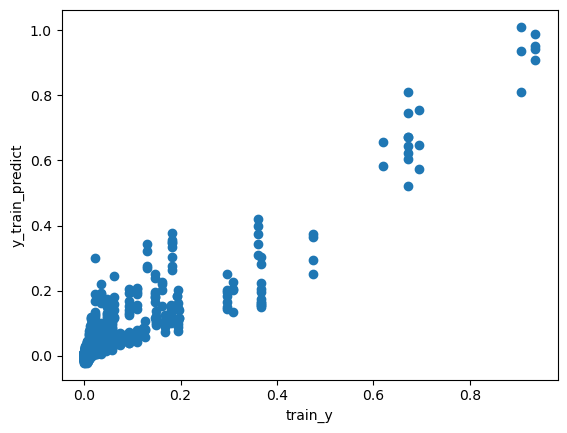

In [10]:
import matplotlib.pyplot as ptl
ptl.scatter(train_y,y_train_predict)
ptl.xlabel('train_y')
ptl.ylabel('y_train_predict')

R^2 for TEST DATA

8/8 [==============================] - 0s 3ms/step
0.8621736100800084


Text(0, 0.5, 'y_test_predict')

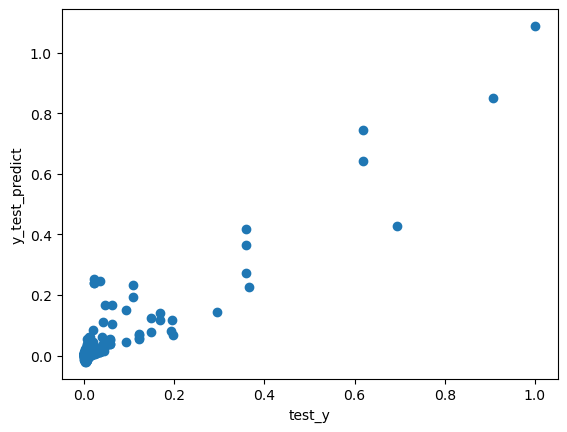

In [11]:
y_test_predict=model.predict(test_x)
r2_test=r2_score(test_y,y_test_predict)
print(r2_test)
ptl.scatter(test_y,y_test_predict)
ptl.xlabel('test_y')
ptl.ylabel('y_test_predict')

RMSprop OPTIMIZER 

In [12]:
#USING RMSprop optimizer
model.compile(optimizer='RMSProp',loss='MSE')

In [13]:
#Training data
train_data=model.fit(train_x,train_y,epochs=500,validation_split=0.15)

Epoch 1/500
37/37 [==============================] - 1s 8ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 2/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 3/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 4/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 5/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 6/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 7/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 8/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 9/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 10/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 11/

In [14]:
# Calculation of Mean Squared Error (MSE)
y_train_predict=model.predict(train_x)
print("For training")
trainingMSE=mean_squared_error(train_y,y_train_predict)
print("MSE is :", trainingMSE)

#calculation of R^2
r2_train=r2_score(train_y,y_train_predict)

print("R^2 is :", r2_train)

#prediction of testing data
y_test_predict=model.predict(test_x)
r2_test=r2_score(test_y,y_test_predict)
print("for testing R^2 is", r2_test)

43/43 [==============================] - 0s 2ms/step
For training
MSE is : 0.001987668738024815
R^2 is : 0.8319617372838757
8/8 [==============================] - 0s 2ms/step
for testing R^2 is 0.8059149735034831


Text(0, 0.5, 'y_train_predict')

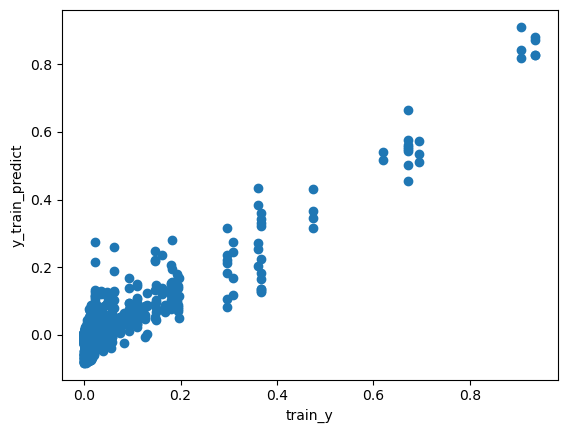

In [15]:
ptl.scatter(train_y,y_train_predict)
ptl.xlabel('train_y')
ptl.ylabel('y_train_predict')

Text(0, 0.5, 'y_test_predict')

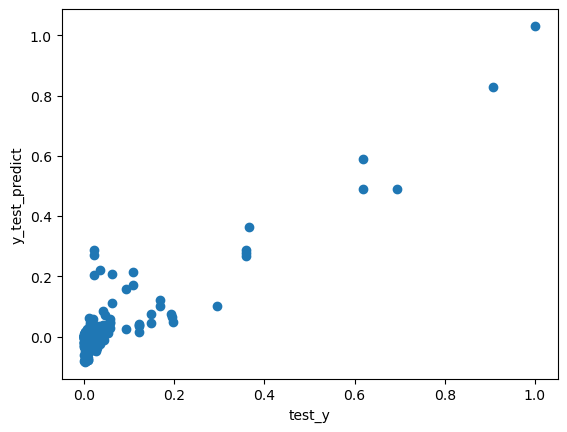

In [16]:
ptl.scatter(test_y,y_test_predict)
ptl.xlabel('test_y')
ptl.ylabel('y_test_predict')

So as we can see from the above results RMSprop optimizer is giving better results than adam optimizer

i.e. R^2 for train and test data for adam optimizer is 0.8718 and 0.8622

R^2 for train and test data for RMSprop optimizer is 0.8319 and 0.8059